<a href="https://colab.research.google.com/github/TenzingJoseph/CTS-Python/blob/main/Ecommerce_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required Libraries

In [89]:
import numpy as np                # Multi-Dimensional array object
import pandas as pd               # Data Manipulation
import matplotlib.pyplot as plt   # Data Visualization
import seaborn as sns             # Data Visualization 

from sklearn.model_selection import train_test_split  # Train, test & split
from sklearn.linear_model import LinearRegression     # Linear regression
from sklearn import metrics                           # Metrics

## Loading required Dataset

In [90]:
df = pd.read_csv('Ecommerce Customers.csv')


In [91]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [92]:
df.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


## Data Understanding


In [93]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [95]:
df.shape

(500, 8)

In [96]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [97]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [98]:
df.nunique()

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

## Data Preparation

In [99]:
df.drop(['Email','Address','Avatar'], axis=1, inplace=True)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


We dont need Email, Address and Avatar columns for further Analysis.

## EDA

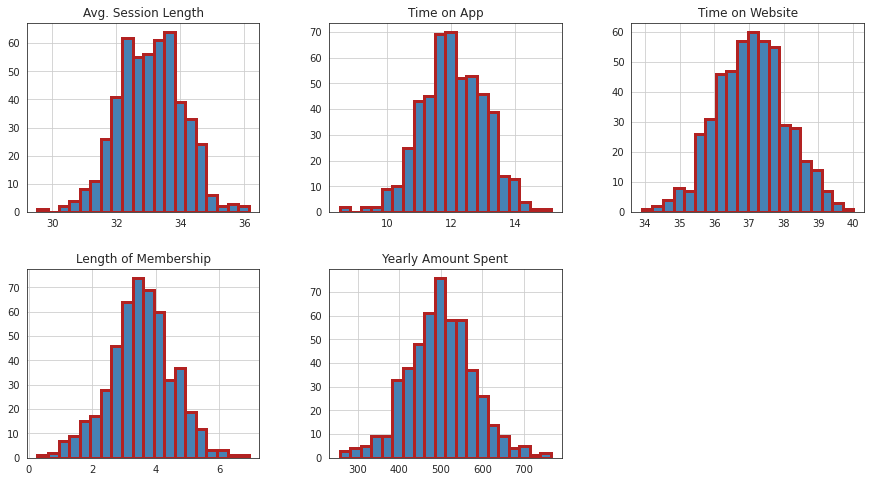

In [100]:
# Histogram for each continuous variable

df.hist(figsize=(15, 8), bins=20, layout=(2, 3), color='steelblue',
                      edgecolor='firebrick', linewidth=3);

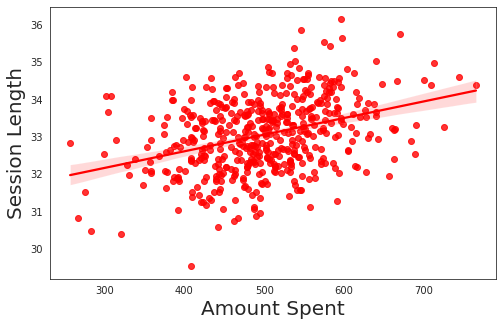

In [101]:
# Regression Plot to observe the Session length with Amount Spent

plt.figure(figsize = (8,5))
sns.set_style("white")
sns.regplot(data = df, y = 'Avg. Session Length', x = 'Yearly Amount Spent', color='Red')
plt.ylabel('Session Length', fontsize = 20)
plt.xlabel('Amount Spent', fontsize = 20)
plt.show()

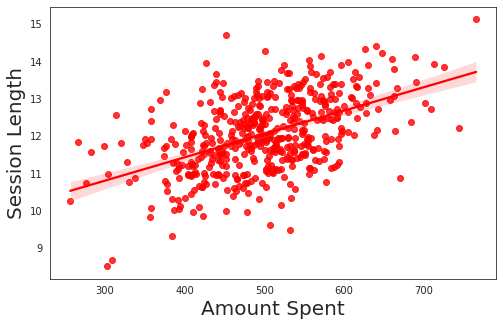

In [102]:
# Regression Plot to observe the Time on App with Amount Spent

plt.figure(figsize = (8,5))
sns.set_style("white")
sns.regplot(data = df, y = 'Time on App', x = 'Yearly Amount Spent', color='Red')
plt.ylabel('Session Length', fontsize = 20)
plt.xlabel('Amount Spent', fontsize = 20)
plt.show()

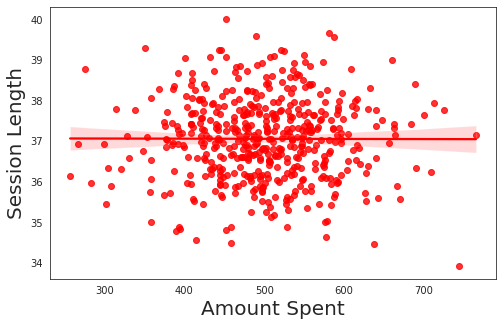

In [103]:
# Regression Plot to observe the Time on Website with Amount Spent

plt.figure(figsize = (8,5))
sns.set_style("white")
sns.regplot(data = df, y = 'Time on Website', x = 'Yearly Amount Spent', color='Red')
plt.ylabel('Session Length', fontsize = 20)
plt.xlabel('Amount Spent', fontsize = 20)
plt.show()

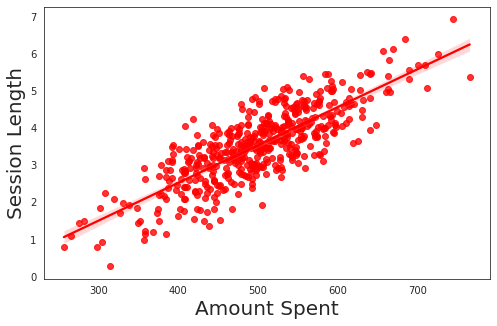

In [104]:
# Regression Plot to observe the Length of Membership with Amount Spent

plt.figure(figsize = (8,5))
sns.set_style("white")
sns.regplot(data = df, y = 'Length of Membership', x = 'Yearly Amount Spent', color='Red')
plt.ylabel('Session Length', fontsize = 20)
plt.xlabel('Amount Spent', fontsize = 20)
plt.show()

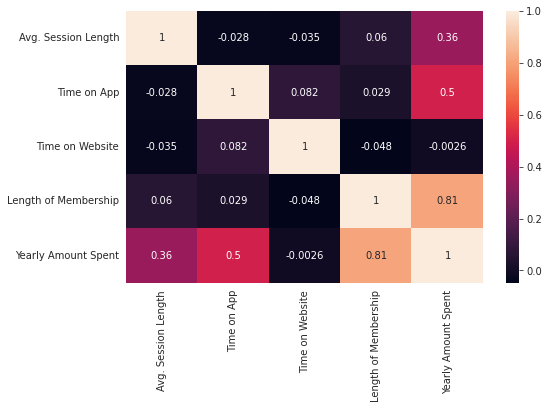

In [105]:
# Heatmap 

corr = df.corr()

fig, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(corr, annot=True)

## Data Preprocessing

In [106]:
# Assigning the dependent and independent variables

X = df.drop(["Yearly Amount Spent"], axis = 1)
y = df["Yearly Amount Spent"]

In [107]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

The data has been splitted into the ratio of 70% train data and 30% test data.

## Model Buliding

In [108]:
# Building Linear regression model with train data

model_LR = LinearRegression()     
model_LR.fit(X_train, y_train)

LinearRegression()

In [109]:
# Obtaining the coefficients of each features

coeff_df = pd.DataFrame(model_LR.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.827920
Time on App,38.809001
Time on Website,0.281743
Length of Membership,61.304799


## Residual Analysis

In [110]:
# Predicting with train data

y_train_pred = model_LR.predict(X_train)
y_train_pred

array([561.76041212, 500.11246454, 597.89020471, 546.11253813,
       443.02933121, 672.09657823, 433.03485181, 672.01357207,
       502.43267372, 590.13894027, 569.70876817, 530.02067923,
       481.40486247, 371.49660328, 534.94678481, 520.22071305,
       468.79541427, 619.48536465, 542.83303412, 461.41640236,
       485.5274032 , 512.02355992, 424.26382801, 542.53298689,
       500.94156915, 451.04324412, 366.96611519, 445.54166093,
       422.77619078, 607.24359385, 544.02559967, 648.53284309,
       508.25701104, 543.22180586, 519.74884721, 448.98185131,
       545.11376484, 554.65153347, 397.9458687 , 531.7990824 ,
       562.50371279, 507.67385392, 481.71141777, 604.56001897,
       752.61325392, 476.64027563, 424.72035147, 403.42491763,
       528.61328856, 418.32998368, 426.92914636, 315.53116392,
       576.48709028, 409.71213857, 565.06904026, 405.21576803,
       583.81214403, 505.96046581, 471.99794613, 546.3278475 ,
       464.38191616, 461.22744534, 554.84509586, 396.22

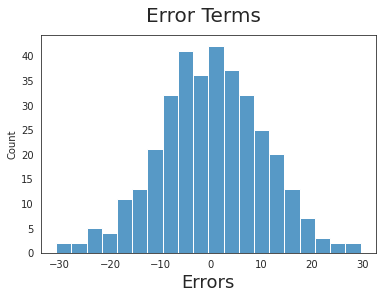

In [111]:
# Residual Error Plot

fig = plt.figure()
sns.histplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18);

Since Error term is normally distributed along mean zero hence it is a stable model.

## Scoring

In [112]:
# Predicting with test data

y_predict = model_LR.predict(X_test)
y_predict

array([498.81705536, 519.53403729, 562.94886718, 478.90501346,
       423.8201042 , 508.9452329 , 478.79059717, 460.08112597,
       519.38576043, 439.12699354, 487.54907742, 525.96826109,
       577.12393843, 553.53565548, 685.14181281, 473.40359409,
       314.71860742, 458.39761038, 452.38929377, 461.05452656,
       456.35300072, 332.21392109, 504.18566874, 401.88060608,
       766.19989355, 425.98233166, 513.22023323, 476.80244451,
       306.817882  , 590.05645167, 505.29246026, 390.12626034,
       463.7152543 , 316.10191094, 465.93448787, 549.73327826,
       619.77113721, 591.76573022, 495.80310959, 402.82346134,
       506.99424985, 547.62013178, 422.98145388, 558.84117357,
       441.84404018, 432.93355219, 430.19970737, 507.00591399,
       425.73050946, 402.16982748, 553.00099819, 353.71999664,
       639.24296314, 478.49076533, 452.15843176, 621.4676865 ,
       326.0497008 , 491.38826582, 411.86794125, 549.10581517,
       587.73075486, 547.94268826, 567.83335035, 588.73

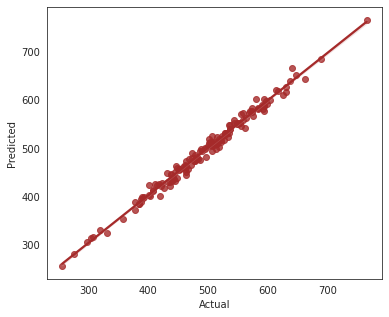

In [113]:
# Regression plot between actual and predicted values

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

plt.figure(figsize = (6,5))
sns.regplot(x='Actual', y='Predicted', data=df1, color='brown');

From the above scatter plot, we can say that our model is giving good prediction values.

## Model Evaluation

In [114]:
print('Mean Absolute Error     :', "%.2f" % metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error      :', "%.2f" % metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error :', "%.2f" % np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R^2 Value               :', "%.4f" % metrics.r2_score(y_test, y_predict))

Mean Absolute Error     : 7.10
Mean Squared Error      : 80.90
Root Mean Squared Error : 8.99
R^2 Value               : 0.9885
